## ICCLIM C4I: Calculate the averaged surface temperature anomaly and the same for precipitation anomaly over the period 2081-2100 compared to the period 1981-2000, and display delta-T delta-P diagram

Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the averaged temperature anomaly (using the TG indicator) vs the precipitation anomaly (using the PRCPTOT indicator) for the period 2081-2100 compared to the reference 1981-2000 for SSP 585 and several climate models. It needs the tas as well as the pr parameter chosen by the user on C4I.

The data is read using xarray and a plot of the a deltaT-deltaP diagram with data averaged over Europe is generated.

The datasets that are expected for this notebook are tas and pr parameters (needed to calculate the TG and PRCPTOT indicators respectively) for several climate models, for the historical (1981-2000) and future (2081-2100) SSP 585 experiment and for several climate models and one member. Daily data is used. In C4I, you can find all of the data needed in the CMIP6 project, at the **esgf-data3.ceda.ac.uk** and **esgf.nci.org.au** mirrors.

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import nc_time_axis

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
numpy:  1.21.5
xarray:  0.20.2
pandas:  1.3.5
icclim:  5.0.2
cftime:  1.5.1.1


### Specification of the parameters and period of interest

The time period of interest as well as the reference period are defined here.
A list of models is listed here as an example.
Here we used Monthly data (Amon) but daily data could also be used.
The corresponding datafiles must have been selected by the user, containing both the studied and referenced periods.

icclim is then executed for both periods for each climate model separately.

In [2]:
# studied period
yearb = 2081
yeare = 2100
dt1 = datetime.datetime(yearb,1,1)
dt2 = datetime.datetime(yeare,12,31)

# reference period
yearrefb = 1981
yearrefe = 2000
dtr1 = datetime.datetime(yearrefb,1,1)
dtr2 = datetime.datetime(yearrefe,12,31)

# studied domain
# Western Europe
minlat = 30
maxlat = 56
minlon = -30
maxlon = 30

models=['ACCESS-CM2','BCC-CSM2-MR','CMCC-ESM2','GFDL-ESM4','INM-CM5-0','MPI-ESM1-2-LR']
out_f={}
out_hist_f={}
out_f_pr={}
out_hist_f_pr={}
files=[]
files_hist=[]
files_pr=[]
files_hist_pr=[]
for model in models:
  print("Processing model: "+model)
  out_f[model] = 'dtdp_tg_icclim_'+model+'.nc'
  out_hist_f[model] = 'dtdp_tg_icclim_'+model+'_hist.nc'
  out_f_pr[model] = 'dtdp_pr_icclim_'+model+'.nc'
  out_hist_f_pr[model] = 'dtdp_pr_icclim_'+model+'_hist.nc'
  files.append('dtdp_tg_icclim_'+model+'.nc')
  files_hist.append('dtdp_tg_icclim_'+model+'_hist.nc')
  files_pr.append('dtdp_prcptot_icclim_'+model+'.nc')
  files_hist_pr.append('dtdp_prcptot_icclim_'+model+'_hist.nc')
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_19500101-19991231.nc
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_20000101-20141231.nc
  #tas_day_INM-CM5-0_ssp585_r1i1p1f1_gr1_20650101-21001231.nc
  filenames_hist = glob.glob('./data/latest/tas_day_'+model+'_historical_*.nc')
  filenames_585 = glob.glob('./data/latest/tas_day_'+model+'_ssp585_*.nc')
  filenames_hist_pr = glob.glob('./data/latest/pr_day_'+model+'_historical_*.nc')
  filenames_585_pr = glob.glob('./data/latest/pr_day_'+model+'_ssp585_*.nc')
        
  icclim.index(index_name='TG', in_files=filenames_585, var_name='tas', slice_mode='year', time_range=[dt1, dt2], out_file=out_f[model], logs_verbosity='LOW')
  icclim.index(index_name='TG', in_files=filenames_hist, var_name='tas', slice_mode='year', time_range=[dtr1, dtr2], out_file=out_hist_f[model], logs_verbosity='LOW')
  icclim.index(index_name='PRCPTOT', in_files=filenames_585_pr, var_name='pr', slice_mode='year', time_range=[dt1, dt2], out_file=out_f_pr[model], logs_verbosity='LOW')
  icclim.index(index_name='PRCPTOT', in_files=filenames_hist_pr, var_name='pr', slice_mode='year', time_range=[dtr1, dtr2], out_file=out_hist_f_pr[model], logs_verbosity='LOW')

print("Processing finished.")

2022-02-11 15:50:53,866 --- icclim 5.0.2
2022-02-11 15:50:53,867 --- BEGIN EXECUTION
2022-02-11 15:50:53,868 Processing: 0%


Processing model: ACCESS-CM2


2022-02-11 15:50:54,125 Calculating climate index: TG
2022-02-11 15:51:06,616 Processing: 100%
2022-02-11 15:51:06,617 --- icclim 5.0.2
2022-02-11 15:51:06,618 --- CPU SECS = 22.371    
2022-02-11 15:51:06,618 --- END EXECUTION
2022-02-11 15:51:06,623 --- icclim 5.0.2
2022-02-11 15:51:06,624 --- BEGIN EXECUTION
2022-02-11 15:51:06,624 Processing: 0%
2022-02-11 15:51:06,982 Calculating climate index: TG
2022-02-11 15:51:26,670 Processing: 100%
2022-02-11 15:51:26,671 --- icclim 5.0.2
2022-02-11 15:51:26,671 --- CPU SECS = 49.983    
2022-02-11 15:51:26,671 --- END EXECUTION
2022-02-11 15:51:26,684 --- icclim 5.0.2
2022-02-11 15:51:26,684 --- BEGIN EXECUTION
2022-02-11 15:51:26,685 Processing: 0%
2022-02-11 15:51:26,871 Calculating climate index: PRCPTOT
2022-02-11 15:51:38,373 Processing: 100%
2022-02-11 15:51:38,374 --- icclim 5.0.2
2022-02-11 15:51:38,374 --- CPU SECS = 69.274    
2022-02-11 15:51:38,375 --- END EXECUTION
2022-02-11 15:51:38,380 --- icclim 5.0.2
2022-02-11 15:51:38,38

Processing model: BCC-CSM2-MR


2022-02-11 15:51:56,607 Calculating climate index: TG
2022-02-11 15:52:03,211 Processing: 100%
2022-02-11 15:52:03,211 --- icclim 5.0.2
2022-02-11 15:52:03,212 --- CPU SECS = 115.066   
2022-02-11 15:52:03,212 --- END EXECUTION
2022-02-11 15:52:03,214 --- icclim 5.0.2
2022-02-11 15:52:03,215 --- BEGIN EXECUTION
2022-02-11 15:52:03,215 Processing: 0%
2022-02-11 15:52:06,698 Calculating climate index: TG
2022-02-11 15:52:13,553 Processing: 100%
2022-02-11 15:52:13,554 --- icclim 5.0.2
2022-02-11 15:52:13,554 --- CPU SECS = 135.493   
2022-02-11 15:52:13,555 --- END EXECUTION
2022-02-11 15:52:13,557 --- icclim 5.0.2
2022-02-11 15:52:13,558 --- BEGIN EXECUTION
2022-02-11 15:52:13,559 Processing: 0%
2022-02-11 15:52:15,501 Calculating climate index: PRCPTOT
2022-02-11 15:52:22,585 Processing: 100%
2022-02-11 15:52:22,585 --- icclim 5.0.2
2022-02-11 15:52:22,586 --- CPU SECS = 160.497   
2022-02-11 15:52:22,587 --- END EXECUTION
2022-02-11 15:52:22,590 --- icclim 5.0.2
2022-02-11 15:52:22,59

Processing model: CMCC-ESM2


2022-02-11 15:52:32,645 Calculating climate index: TG
2022-02-11 15:52:46,770 Processing: 100%
2022-02-11 15:52:46,770 --- icclim 5.0.2
2022-02-11 15:52:46,771 --- CPU SECS = 212.236   
2022-02-11 15:52:46,771 --- END EXECUTION
2022-02-11 15:52:46,779 --- icclim 5.0.2
2022-02-11 15:52:46,780 --- BEGIN EXECUTION
2022-02-11 15:52:46,780 Processing: 0%
2022-02-11 15:52:47,222 Calculating climate index: TG
2022-02-11 15:53:01,508 Processing: 100%
2022-02-11 15:53:01,509 --- icclim 5.0.2
2022-02-11 15:53:01,509 --- CPU SECS = 243.740   
2022-02-11 15:53:01,510 --- END EXECUTION
2022-02-11 15:53:01,520 --- icclim 5.0.2
2022-02-11 15:53:01,521 --- BEGIN EXECUTION
2022-02-11 15:53:01,521 Processing: 0%
2022-02-11 15:53:01,769 Calculating climate index: PRCPTOT
2022-02-11 15:53:21,317 Processing: 100%
2022-02-11 15:53:21,317 --- icclim 5.0.2
2022-02-11 15:53:21,318 --- CPU SECS = 283.788   
2022-02-11 15:53:21,318 --- END EXECUTION
2022-02-11 15:53:21,324 --- icclim 5.0.2
2022-02-11 15:53:21,32

Processing model: GFDL-ESM4


2022-02-11 15:53:42,512 Calculating climate index: TG
2022-02-11 15:53:50,959 Processing: 100%
2022-02-11 15:53:50,960 --- icclim 5.0.2
2022-02-11 15:53:50,960 --- CPU SECS = 347.625   
2022-02-11 15:53:50,961 --- END EXECUTION
2022-02-11 15:53:50,968 --- icclim 5.0.2
2022-02-11 15:53:50,968 --- BEGIN EXECUTION
2022-02-11 15:53:50,969 Processing: 0%
2022-02-11 15:53:51,729 Calculating climate index: TG
2022-02-11 15:54:04,543 Processing: 100%
2022-02-11 15:54:04,544 --- icclim 5.0.2
2022-02-11 15:54:04,544 --- CPU SECS = 373.763   
2022-02-11 15:54:04,545 --- END EXECUTION
2022-02-11 15:54:04,550 --- icclim 5.0.2
2022-02-11 15:54:04,551 --- BEGIN EXECUTION
2022-02-11 15:54:04,551 Processing: 0%
2022-02-11 15:54:05,115 Calculating climate index: PRCPTOT
2022-02-11 15:54:19,626 Processing: 100%
2022-02-11 15:54:19,626 --- icclim 5.0.2
2022-02-11 15:54:19,627 --- CPU SECS = 404.162   
2022-02-11 15:54:19,627 --- END EXECUTION
2022-02-11 15:54:19,635 --- icclim 5.0.2
2022-02-11 15:54:19,63

Processing model: INM-CM5-0


2022-02-11 15:54:50,038 Processing: 100%
2022-02-11 15:54:50,039 --- icclim 5.0.2
2022-02-11 15:54:50,039 --- CPU SECS = 457.526   
2022-02-11 15:54:50,040 --- END EXECUTION
2022-02-11 15:54:50,043 --- icclim 5.0.2
2022-02-11 15:54:50,044 --- BEGIN EXECUTION
2022-02-11 15:54:50,044 Processing: 0%
2022-02-11 15:54:50,284 Calculating climate index: TG
2022-02-11 15:54:59,681 Processing: 100%
2022-02-11 15:54:59,682 --- icclim 5.0.2
2022-02-11 15:54:59,682 --- CPU SECS = 473.408   
2022-02-11 15:54:59,683 --- END EXECUTION
2022-02-11 15:54:59,690 --- icclim 5.0.2
2022-02-11 15:54:59,691 --- BEGIN EXECUTION
2022-02-11 15:54:59,691 Processing: 0%
2022-02-11 15:54:59,903 Calculating climate index: PRCPTOT
2022-02-11 15:55:08,223 Processing: 100%
2022-02-11 15:55:08,223 --- icclim 5.0.2
2022-02-11 15:55:08,224 --- CPU SECS = 487.929   
2022-02-11 15:55:08,224 --- END EXECUTION
2022-02-11 15:55:08,228 --- icclim 5.0.2
2022-02-11 15:55:08,228 --- BEGIN EXECUTION
2022-02-11 15:55:08,229 Processi

Processing model: MPI-ESM1-2-LR


2022-02-11 15:55:27,552 Processing: 100%
2022-02-11 15:55:27,553 --- icclim 5.0.2
2022-02-11 15:55:27,553 --- CPU SECS = 520.100   
2022-02-11 15:55:27,554 --- END EXECUTION
2022-02-11 15:55:27,559 --- icclim 5.0.2
2022-02-11 15:55:27,560 --- BEGIN EXECUTION
2022-02-11 15:55:27,560 Processing: 0%
2022-02-11 15:55:27,738 Calculating climate index: TG
2022-02-11 15:55:36,202 Processing: 100%
2022-02-11 15:55:36,203 --- icclim 5.0.2
2022-02-11 15:55:36,203 --- CPU SECS = 533.390   
2022-02-11 15:55:36,204 --- END EXECUTION
2022-02-11 15:55:36,209 --- icclim 5.0.2
2022-02-11 15:55:36,209 --- BEGIN EXECUTION
2022-02-11 15:55:36,210 Processing: 0%
2022-02-11 15:55:36,337 Calculating climate index: PRCPTOT
2022-02-11 15:55:42,776 Processing: 100%
2022-02-11 15:55:42,777 --- icclim 5.0.2
2022-02-11 15:55:42,777 --- CPU SECS = 546.130   
2022-02-11 15:55:42,778 --- END EXECUTION
2022-02-11 15:55:42,783 --- icclim 5.0.2
2022-02-11 15:55:42,783 --- BEGIN EXECUTION
2022-02-11 15:55:42,784 Processi

Processing finished.


### Data preparation

Here all data is loaded in 2 separate variables, one containing all the historical periods for all the models, and the same for the future time period.

Extract geographical domain and deal with longitudes

In [3]:
# Open datasets
tg = []
tg_hist = []
pr = []
pr_hist = []
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    dsl['time'] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({'model_id':model})

    dslp = xr.open_dataset(out_f_pr[model], decode_times=False)
    dslp['time'] = xr.decode_cf(dslp).time
    dslp = dslp.assign_coords({'model_id':model})

    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl['time'] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({'model_id':model})
    
    dshlp = xr.open_dataset(out_hist_f_pr[model], decode_times=False)
    dshlp['time'] = xr.decode_cf(dshlp).time
    dshlp = dshlp.assign_coords({'model_id':model})
    
# Reorder longitudes if needed and extract domain    
    if minlon > maxlon or minlon < 0:
        dsl = dsl.assign_coords(lon=(((dsl.lon + 180) % 360) - 180)).roll(lon=(dsl.dims['lon'] // 2), roll_coords=True)
        dslp = dslp.assign_coords(lon=(((dslp.lon + 180) % 360) - 180)).roll(lon=(dslp.dims['lon'] // 2), roll_coords=True)
        dshl = dshl.assign_coords(lon=(((dshl.lon + 180) % 360) - 180)).roll(lon=(dshl.dims['lon'] // 2), roll_coords=True)
        dshlp = dshlp.assign_coords(lon=(((dshlp.lon + 180) % 360) - 180)).roll(lon=(dshlp.dims['lon'] // 2), roll_coords=True)

        if minlon >= 180:
            minlon = minlon - 360
        if maxlon >= 180:
            maxlon = maxlon - 360
            
    dsl = dsl.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dslp = dslp.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dshl = dshl.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dshlp = dshlp.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    
    tg.append(dsl['TG'])
    pr.append(dslp['PRCPTOT'])
    tg_hist.append(dshl['TG'])
    pr_hist.append(dshlp['PRCPTOT'])

### Perform spatial average on the extracted geographical domain

In [4]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].mean(dim=['lon','lat'])
for ii in range(len(pr)):
    pr[ii] = pr[ii].mean(dim=['lon','lat'])
for ii in range(len(tg_hist)):
    tg_hist[ii] = tg_hist[ii].mean(dim=['lon','lat'])
for ii in range(len(pr_hist)):
    pr_hist[ii] = pr_hist[ii].mean(dim=['lon','lat'])

### Define a function to align all different calendar types

In [5]:
# Define function to align different calendars using annual data
def to_pandas_dt(da):
    '''Takes an annual DataArray. Change the calendar to a pandas datetime.'''
    val = da.copy()
    #val.resample(time='Y').mean('time')
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes['time']):
      timev.append(years[itime])

    timevp = pd.to_datetime(timev, format="%Y")
    time1 = xr.DataArray(data=timevp, dims=["time"])
    time1.name = 'time'
    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'timepd'})
    time1 = time1.rename({'time':'timepd'})
    val = val.assign_coords({'timepd':time1})

    return val

### Align calendars of all input data

In [6]:
# Convert all calendars to annual precision (we have configured icclim to output yearly data)
ll = [to_pandas_dt(da) for da in tg]
llp = [to_pandas_dt(da) for da in pr]
ll_hist = [to_pandas_dt(da) for da in tg_hist]
llp_hist = [to_pandas_dt(da) for da in pr_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, 'model_id', join='outer')
full_pr = xr.concat(llp, 'model_id', join='outer')
full_tg_hist = xr.concat(ll_hist, 'model_id', join='outer')
full_pr_hist = xr.concat(llp_hist, 'model_id', join='outer')
full_tg_anomaly = full_tg.mean(dim='timepd') - full_tg_hist.mean(dim='timepd')
full_pr_anomaly = (full_pr.mean(dim='timepd') - full_pr_hist.mean(dim='timepd'))/full_pr.mean(dim='timepd')*100.0

### Plot a multi-model scatter plot of the anomalies of temperature and precipitation of the future time period 2081-2100 SSP 585 compared to the historical period

Temperature and Precipitation anomalies for SSP585 of the period 2080-2100 vs 1981-2000.

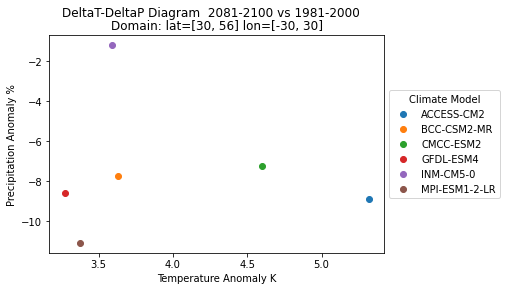

In [7]:
# Plot deltaT-deltaP diagram

# To use xarray scatter plot, create a new Dataset using both DataArrays
ds_anomaly = xr.Dataset({'TG': full_tg_anomaly, 'PRCPTOT': full_pr_anomaly})

# Scatter Plot
xr.plot.scatter(ds_anomaly, 'TG', 'PRCPTOT', hue='model_id')
plt.suptitle("DeltaT-DeltaP Diagram  "+str(yearb)+"-"+str(yeare)+" vs "+str(yearrefb)+"-"+str(yearrefe))
plt.title("Domain: lat=["+str(minlat)+", "+str(maxlat)+"] lon=["+str(minlon)+", "+str(maxlon)+"]")
plt.ylabel("Precipitation Anomaly %")
plt.xlabel("Temperature Anomaly K")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Climate Model')